# 支持向量机SVM
## 基本概念
首先，来了解下什么是“线性可分”和“线性不可分”。例如，我们知道男生是很简单的动物，假设男生的情绪分布图如下所示:

<img src="svm-1.png" width="720">

可以看到，当我们提取样本特征为“游戏的质量”和“妹子的颜值”这两项的时候，很容易用图中的直线把男生的情绪分成“开心”和“不开心”两类，这种情况下我们说样本是线性可分的。  
但是，女生的情绪可能会复杂的多，从男生的角度看，她们的情绪分布可能如下图所示:

<img src="svm-2.png" width="720">

上图中可以感受到“直男”线性模型深深的绝望，无论哪条直线，都无法将女生的情绪进行正确分类。在这种情况下，我们说样本是线性不可分的。  
在SVM支持向量机中，我们假设“开心”的情绪是轻飘飘的，“不开心”的情绪是沉重的，把上图扔到水中，“开心”会飘起来，而“不开心”会沉下去，变成如下图所示:

<img src="svm-3.png" width="720">

如上图所示，我们可以看到，经过处理后的数据很容易用一个平面进行分类了。如果从正上方向下看，将三维视图还原成而为，可以发现分类器是下图的样子: 

<img src="svm-4.png" width="720">

这种将二维数据变成三维的过程，称为将数据投射至高维空间，这是SVM算法的核函数(kernel trick)功能，在SVM中用的最普遍的两种方法分别是多项式内核(Polynomial kernel)和径向基内核(Radial basis function kernel, RBF)。其中前者是把样本原始特征进行乘方，比如特征1乘2次方，特征2乘3次方，特征3乘5次方等，而RBF内核也被称为高斯内核(Gaussian kernel)。  
### 支持向量机SVM的核函数
在SVM算法中，训练模型的过程是对每个数据点对于数据分类决定边界的重要性进行判断。也就是说，训练集中只有一部分数据对于边界的确定是有帮助的，而这些数据点就是正好位于边界上。这些数据被称为“支持向量”(support vectors)，这也是“支持向量机”的由来。

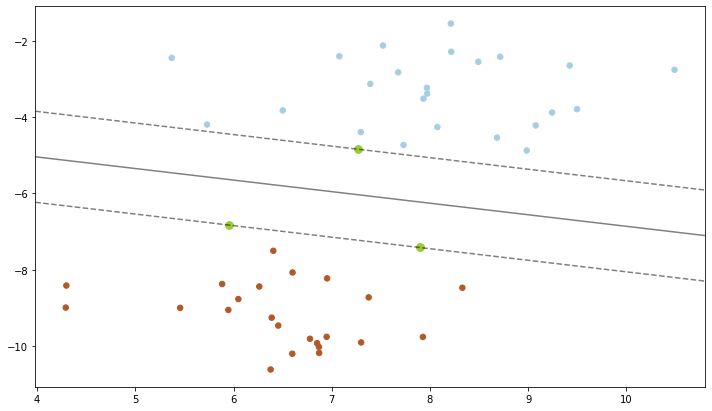

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# 先创建50个数据点，让它们分为两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# 创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
# 把数据点画出来
plt.figure(figsize=(12,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
# 生成网格矩阵
YY, XX = np.meshgrid(yy, xx)
# ravel矩阵扁平化
# vstack串联数组
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# reshape，重新塑形，将一维数组分割成多维数组
Z = clf.decision_function(xy).reshape(XX.shape)

# 用等高线图把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=60,
           linewidth=1, facecolors='#99cc33')
plt.show()

**结果分析**: 分类器两侧有两条虚线，那些刚好压在虚线上的数据点就是支持向量。本例的方法称为“最大边界间隔超平面”(Maximum Margin Separating Hyperplane)。即中间的实线（高维数据中的超平面），和所有支持向量之间的距离都是最大的。
如果将内核换成RBF，结果如下:  

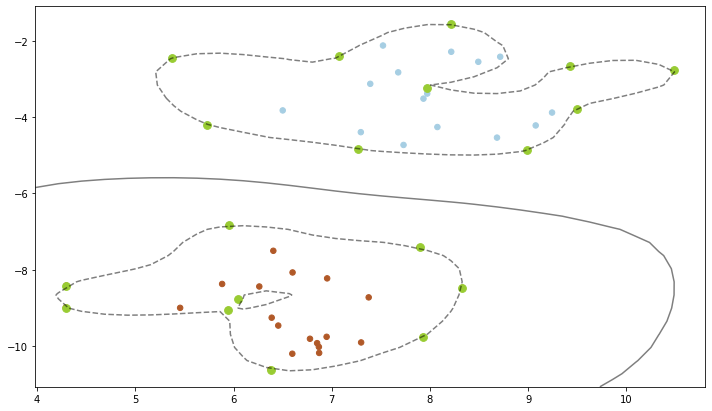

In [5]:
# 创建一个RBF内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf', C=1000, gamma='auto')
clf_rbf.fit(X, y)
# 把数据点画出来
plt.figure(figsize=(12,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=60,
           linewidth=1, facecolors='#99cc33')
plt.show()

**结果分析**: 使用RBF内核时，数据点之间的距离用如下公式计算:   
$$k_{rbf}(x_1,x_2)=exp(γ||x_1-x_2||^2)$$
其中$x_1$和$x_2$代表两个数据点，$||x_1-x_2||$代表两个点的欧几里得距离，$γ$用来控制RBF内核宽度，即图中实线距离两条虚线的距离。

## SVM核函数与参数选择
在线性模型中，我们提到过linearSVM的算法。linearSVM就是使用了线性模型的SVM算法。不过linearSVM不支持对核函数进行修改，只能使用线性内核。而SVM算法是支持不同的内核的。

/Users/yy/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


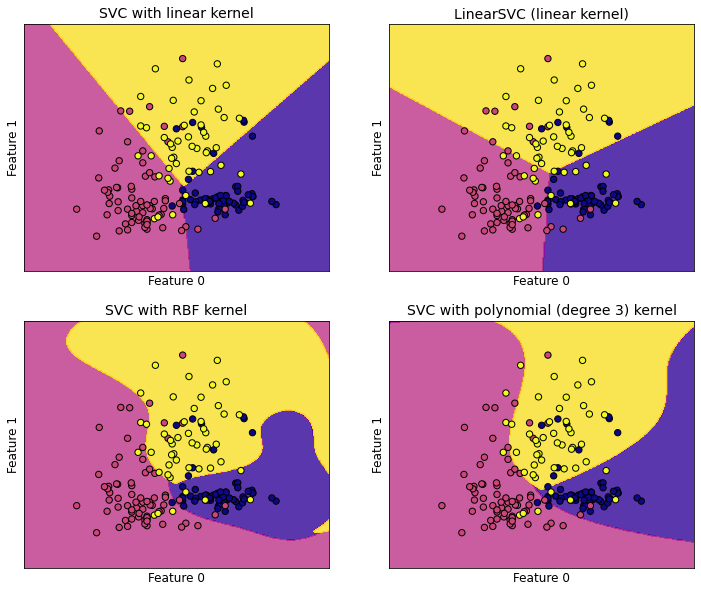

In [7]:
from sklearn.datasets import load_wine
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# 使用酒的数据集
wine = load_wine()
# 选取数据集的前两个特征
X = wine.data[:, :2]
y = wine.target


C = 1.0  # SVM 正则化参数
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)


titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


fig, sub = plt.subplots(2, 2, figsize = (12,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=40, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0', fontsize = 12)
    ax.set_ylabel('Feature 1', fontsize = 12)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize = 14)

plt.show()

**结果分析**: 使用线性内核的SVC和linearSVC得到的结果非常近似，但仍有差别。其中主要原因是linearSVC对L2范数进行最小化，而线性内核的SVC对L1范数进行最小化（范数，是具有“长度”概念的函数，是矢量空间内的所有矢量赋予非零的正长度或大小）。  
在polynomial内核中，起决定作用的是degree和正则化参数C。本例中使用的degree为3，即对原始数据集的特征进行3次方操作。C可以理解为允许划分错误的权重（越大，越不允许出错），当C较小时，允许少量样例划分错误。而在RBF内核中起决定性作用的是正则化参数C和gamma。  
### 支持向量机的gamma参数调节

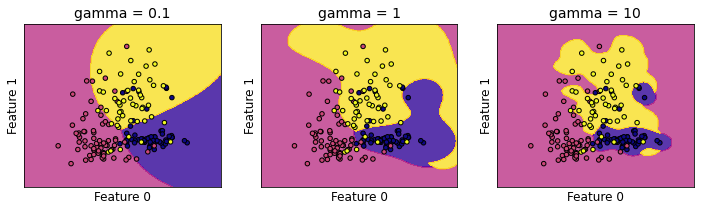

In [8]:
C = 1.0  # SVM 正则化参数
models = (svm.SVC(kernel='rbf', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=10, C=C))
models = (clf.fit(X, y) for clf in models)


titles = ('gamma = 0.1',
          'gamma = 1',
          'gamma = 10',
          )


fig, sub = plt.subplots(1, 3,figsize = (12,3))
#plt.subplots_adjust(wspace=0.8, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0' , fontsize = 12)
    ax.set_ylabel('Feature 1', fontsize = 12)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize = 14)

plt.show()

**结果分析**: 从左到右gamma值从0.1增加到10，gamma值越小，则RBF内核的直径越大，这样会有更多的点被模型圈进决定边界中，边界就越平滑，模型也越简单。随着gamma的增大，模型倾向于把每个点都放到决定边界中，模型复杂度就提高了。所以gamma值越小，模型越倾向于欠拟合，gamma值越大，模型越倾向于过拟合。  
C值越小，模型就越受限，单个数据点对模型的影响越小，模型越简单；C越大，每个数据点对模型的影响越大，模型越复杂。
### SVM算法的优势和不足
优势  
- 对各种不同类型的数据集都有不错的表现。
- 对高维数据集和低维数据集表现都不错

短板
- 数据规模不能太大，1万以内比较合适，超过10万会非常耗时间和内存
- 对数据预处理和参数调节要求高
- 建模过程难以呈现

在样本特征树和样本数比较接近以及小型的图像识别，优先选择SVM算法。

## SVM回归分析(SVR)实例——波士顿房价回归分析
### 数据集

In [11]:
import pandas as pd
import numpy as np
raw_df = pd.read_csv("boston.csv", sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

**结果分析**: 4个键，没有target_names

**结果分析**: target是房价中位数
### 使用SVR建模

In [12]:
from sklearn.model_selection import train_test_split
X, y = data, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


In [13]:
from sklearn.svm import SVR
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    print(kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train, y_train)))
    print(kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test, y_test)))

linear 核函数的模型训练集得分：0.709
linear 核函数的模型测试集得分：0.696
rbf 核函数的模型训练集得分：0.192
rbf 核函数的模型测试集得分：0.222


得分非常糟糕，数据可能需要预处理，先看下数据集中各个特征的数量级是什么情况

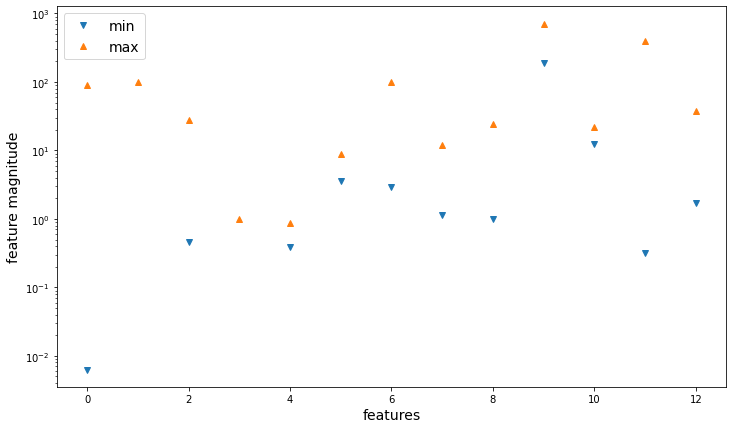

In [14]:
plt.figure(figsize=(12,7))
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='max')
plt.yscale('log')
plt.legend(loc='best', fontsize = 14)
plt.xlabel('features', fontsize = 14)
plt.ylabel('feature magnitude', fontsize = 14)
plt.show()

可见量级差别非常大，我们必须对数据进行预处理。

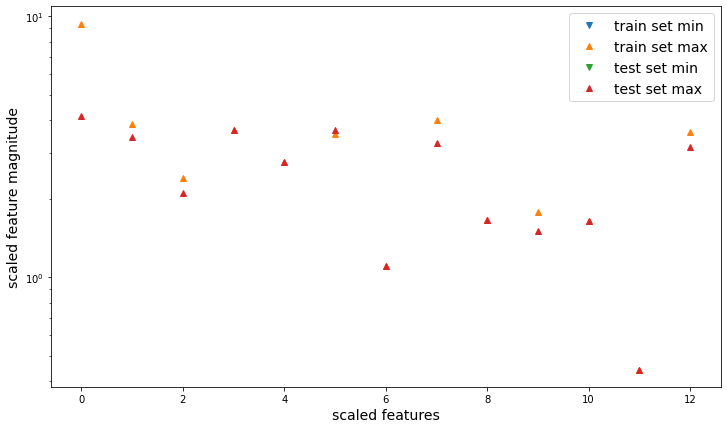

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.figure(figsize=(12,7))
plt.plot(X_train_scaled.min(axis=0),'v',label='train set min')
plt.plot(X_train_scaled.max(axis=0),'^',label='train set max')
plt.plot(X_test_scaled.min(axis=0),'v',label='test set min')
plt.plot(X_test_scaled.max(axis=0),'^',label='test set max')
plt.yscale('log')
plt.legend(loc='best', fontsize = 14)
plt.xlabel('scaled features', fontsize = 14)
plt.ylabel('scaled feature magnitude', fontsize = 14)
plt.show()

用预处理之后的数据训练模型:

In [16]:
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    print('数据预处理后',kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
    print('数据预处理后',kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

数据预处理后 linear 核函数的模型训练集得分：0.706
数据预处理后 linear 核函数的模型测试集得分：0.698
数据预处理后 rbf 核函数的模型训练集得分：0.665
数据预处理后 rbf 核函数的模型测试集得分：0.695


进一步调节参数:

In [17]:
svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
print('调节参数后的模型在训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
print('调节参数后的模型在测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

调节参数后的模型在训练集得分：0.966
调节参数后的模型在测试集得分：0.894


## 小结
- 选定核函数
- 预处理
- 调参